### Import resources and display image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

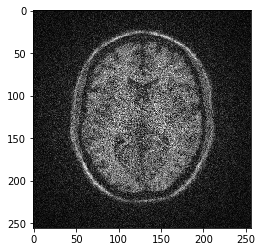

In [2]:
# read in the image
image = cv2.imread('images/brain_noisy.png')

# make a copy
image_copy = np.copy(image)

# change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Applying Gaussiab Blur

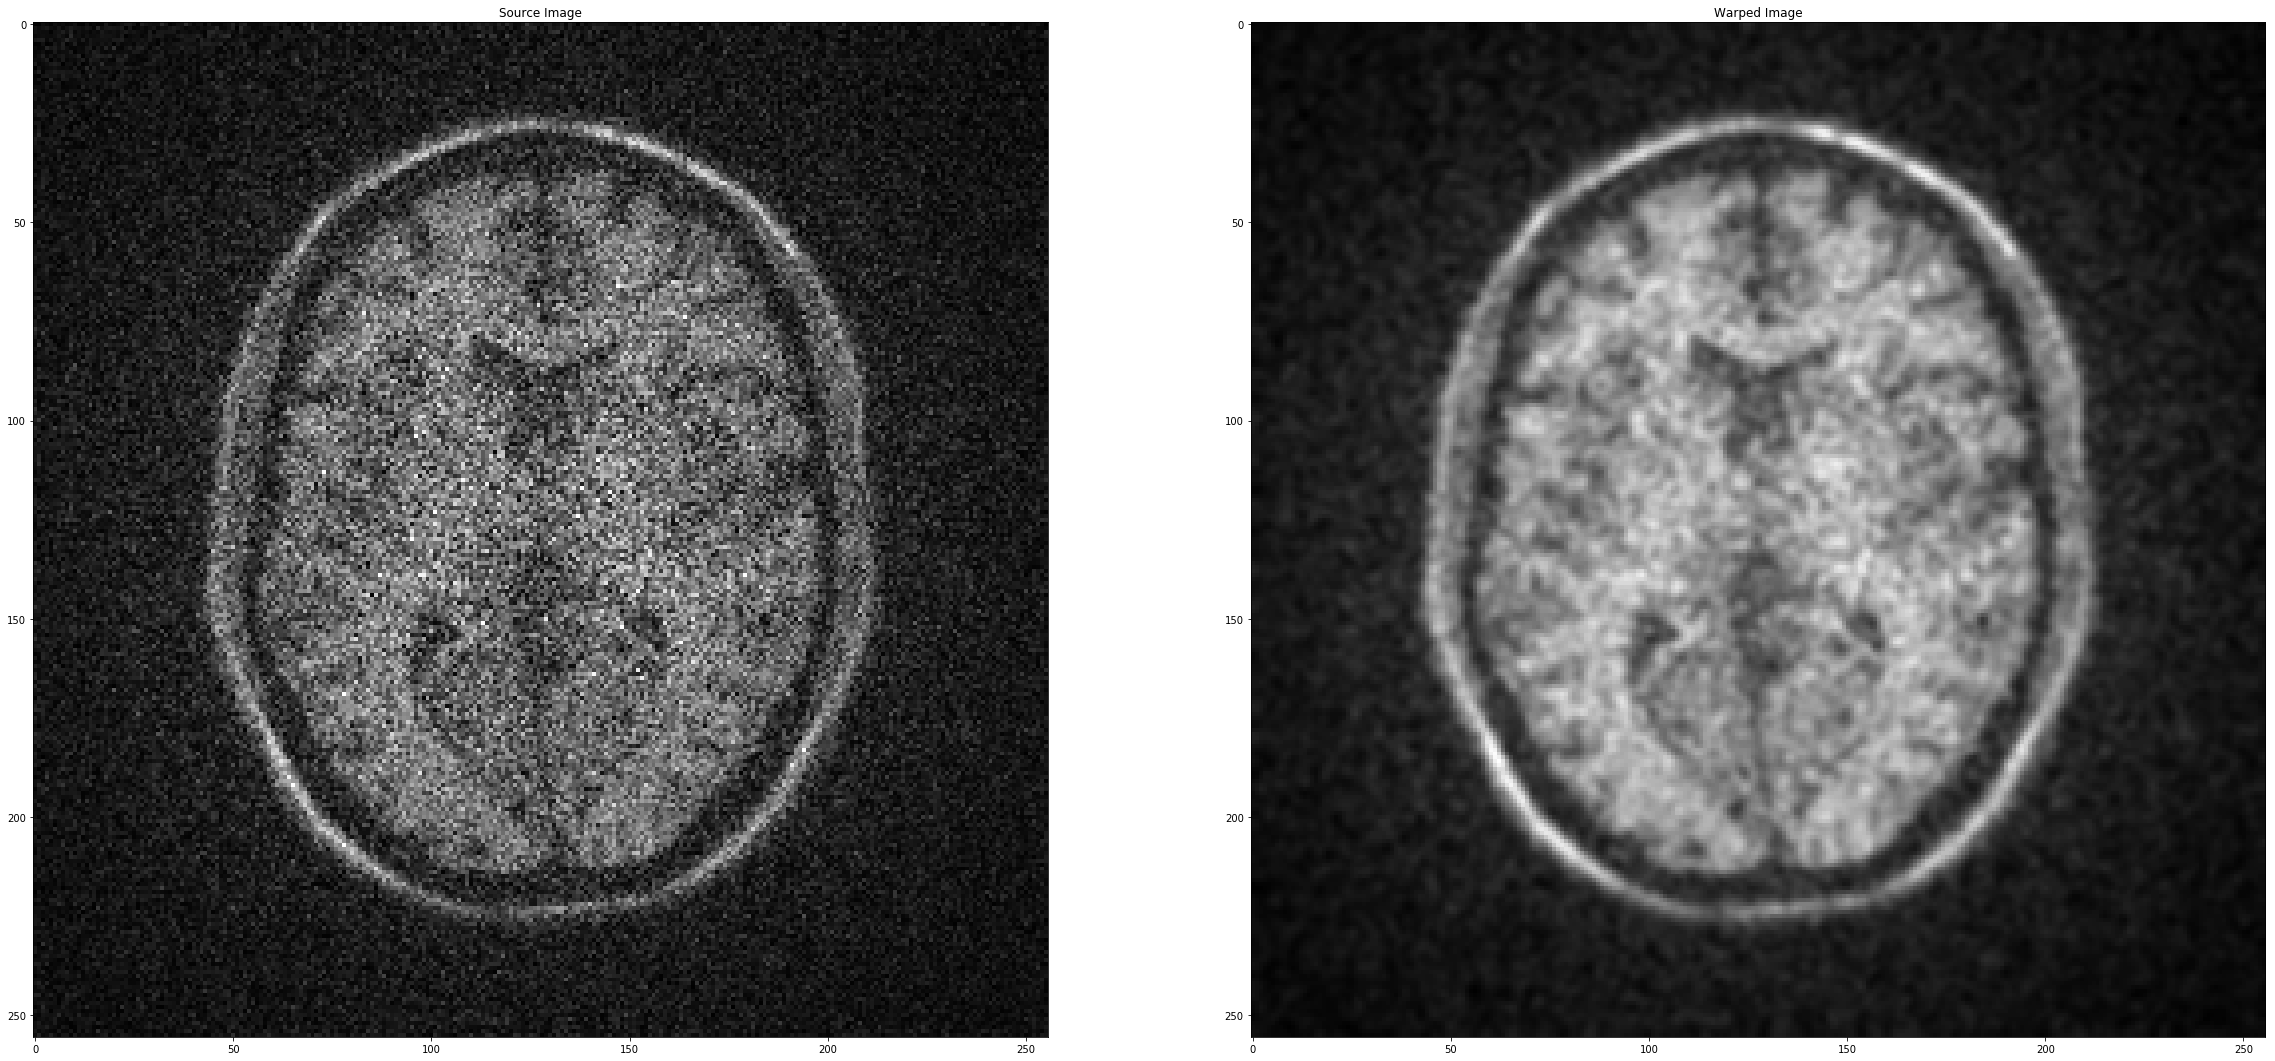

In [4]:
# convert to grayscale for filtering
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# create a gaussian blurred image
gray_blur = cv2.GaussianBlur(gray, (5,5), 0)

# create side-by-side plots
f, (ax1, ax2) = plt.subplots(1,2, figsize=(40,60))

ax1.set_title('Source Image')
ax1.imshow(image_copy)

ax2.set_title('Warped Image')
plt.imshow(gray_blur, cmap='gray')

### Apply high-pass filter (edge detection) to compare performance after smoothing

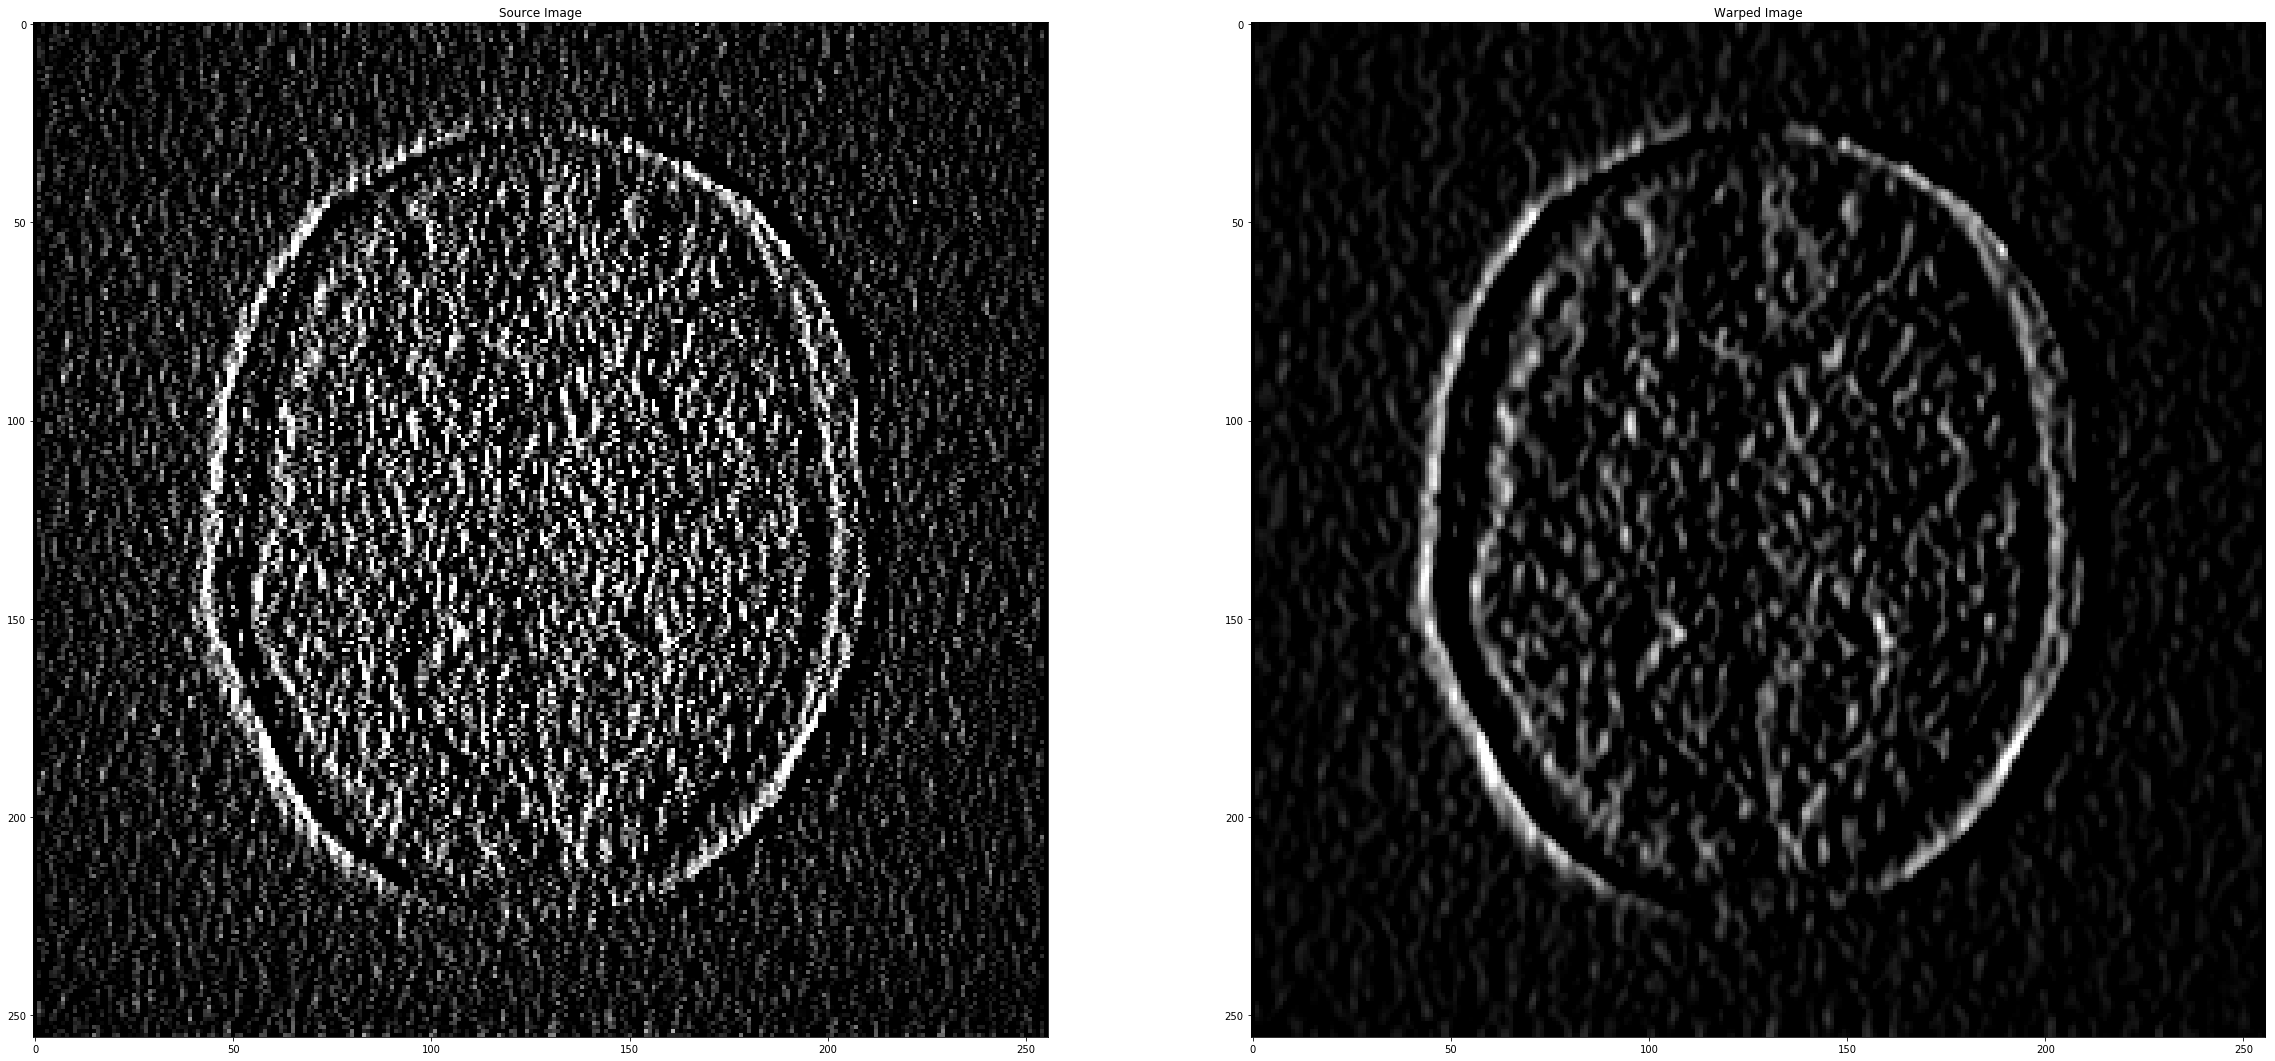

In [5]:
# high-pass filter

# 3x3 sobel filter for edge detection
sobel_x = np.array([
            [-2,0,2],
            [-1,0,1],
            [-2,0,2]])

# create two high pass filters, one for the original gray image and another one for the blurred image
filtered = cv2.filter2D(gray, -1, sobel_x)

filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_x)

# create side-by-side plots
f, (ax1, ax2) = plt.subplots(1,2, figsize=(40,60))

ax1.set_title('Source Image')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('Warped Image')
plt.imshow(filtered_blurred, cmap='gray')

#### As you can see above, the blurred image has a lot less noise than the original image before smoothing. It is a very common technique to apply a low-pass filter (like averaging or guassian) to smooth the image then apply a high-pass filter for edge detection.